# 1. ENTENDIMIENTO DEL NEGOCIO

Problema Central:
El problema central en el caso de LendingClub radica en el desarrollo de modelos predictivos efectivos para evaluar el riesgo crediticio de los prestatarios en la plataforma. Figel se enfrenta a desafíos relacionados con la elección de modelos, el manejo de conjuntos de datos desequilibrados y equilibrados, y la interpretación de los resultados para garantizar una evaluación precisa del riesgo.

Objetivo:
El objetivo principal es construir un modelo predictivo robusto que pueda identificar con precisión a los prestatarios propensos a incumplir en LendingClub. Figel utiliza métodos como la validación cruzada y prueba el desempeño de modelos como la regresión logística y los árboles de decisión. Además, busca abordar la preocupación sobre la calidad de los prestatarios y garantizar que el modelo tenga la capacidad de generalizar su rendimiento a datos no vistos, como se demuestra en la evaluación con un conjunto de retención.

# 2. ENFOQUE ANALÍTICO

Se decidió la comparación de diversos modelos de Machine Learning para facilitar el proceso de clasificación de la variable Loan_Status y determinar de forma óptima si es viable el uso de la aplicación de Lending Club.
Dado el caso se decidió utilizar algoritmos de clasificación.

# 3. REQUERIMIENTO DE LOS DATOS

Se requiere de una base de datos estructurada y amplia, la cual fue obtenida en formato csv.

# 4.RECOLECCIÓN DE DATOS

Las variables que se tenian en el conjunto de datos fueron suficientes y no fue necesario hacer una recolección adicional para obtener modelos confiables.

# 5. ENTENDIMIENTO Y PREPARACIÓN DE DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

import warnings 
warnings.filterwarnings("ignore")

In [2]:
path=r'C:\Users\Di.LAPTOP-OGJT2TAD\Documents\materias\maestria analitica de negocios\ciencia de datos aplicado a finanzas\caso harvard\accepted_2007_to_2018Q4.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
pd.set_option("display.max_columns",None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#Se conoce la cantidad de filas y columnas del set de datos
df.shape

(2260701, 151)

# Limpieza de nulos

In [6]:
nulosColum=df.isnull().sum()
pd.set_option('display.max_rows', None)

In [7]:
#Para conocer los nulos por variable
print(nulosColum)

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

In [8]:
# Porcentaje de valores nulos
PorcNulos=(((df.isnull().sum(axis=0))/2260701)*100)
PorcNulos=PorcNulos[PorcNulos>0]
PorcNulos=pd.DataFrame(PorcNulos)
PorcNulos.reset_index(inplace=True)
PorcNulos.columns=['Variable','%']
PorcNulos

,Variable,%
0,member_id,100.000000
1,loan_amnt,0.001460
2,funded_amnt,0.001460
3,funded_amnt_inv,0.001460
4,term,0.001460
5,int_rate,0.001460
6,installment,0.001460
7,grade,0.001460
8,sub_grade,0.001460
9,emp_title,7.387178


In [9]:
#se quitan las columnas con un % de nulos mayor al 10%
columns_to_drop = PorcNulos[PorcNulos['%'] > 10].iloc[:,0]
df = df.drop(columns=columns_to_drop)

In [10]:
#se quedan 92 variables despues del drop
df.shape

(2260701, 92)

In [11]:
#se eliminan las filas con nulos
df.dropna(axis=0,inplace=True)

In [12]:
df.shape

(1852324, 92)

In [13]:
#se validan que no existen nulos en la base
df.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

In [14]:
#se eliminan estas 4 columnas más por no tener referencias para ser comparadas (por ej fechas) y tener un url
df.drop('url', axis=1, inplace=True)
df.drop('last_pymnt_d', axis=1, inplace=True)
df.drop('last_credit_pull_d', axis=1, inplace=True)
df.drop('earliest_cr_line', axis=1, inplace=True) 

In [15]:
#cantidad de filas y columnas del dataset que quedan
df.shape

(1852324, 88)

In [16]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

# Recategorización de variable a predecir

In [17]:
#Recategorización de variable a predecir:se asigna 1 a las categorias de Fully Paid y Current y 0 a las demás
def map_values(value):
    if value in ['Fully Paid', 'Current']:
        return 1
    else:
        return 0

#se crea nueva columna con recategorizacion
df['loan_status2'] = df['loan_status'].apply(map_values)

In [18]:
df.loan_status2.unique()

array([1, 0], dtype=int64)

In [19]:
#se valida nueva columna creada
df.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status2
2260691,89996426,32000.0,32000.0,32000.0,60 months,14.49,752.74,C,C4,Sales Manager,3 years,MORTGAGE,157000.0,Source Verified,Oct-2016,Charged Off,n,home_improvement,Home improvement,863xx,AZ,10.34,0.0,735.0,739.0,0.0,14.0,0.0,111598.0,27.4,18.0,f,0.00,0.00,3737.940000,3737.94,1876.47,1861.47,0.0,0.0,0.0,752.74,499.0,0.0,0.0,1.0,Individual,0.0,0.0,408701.0,207500.0,10.0,29193.0,14118.0,10.6,0.0,0.0,53.0,63.0,4.0,4.0,3.0,4.0,0.0,5.0,8.0,7.0,7.0,4.0,11.0,11.0,8.0,14.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,N,Cash,N,0
2260692,90006534,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,Manager,10+ years,RENT,150000.0,Not Verified,Oct-2016,Fully Paid,n,medical,Medical expenses,284xx,NC,12.25,0.0,665.0,669.0,0.0,12.0,4.0,7700.0,55.0,28.0,f,0.00,0.00,18660.607569,18660.61,16000.00,2660.61,0.0,0.0,0.0,12874.54,684.0,680.0,0.0,1.0,Individual,0.0,0.0,65797.0,14000.0,9.0,5982.0,2720.0,73.1,0.0,0.0,147.0,229.0,17.0,4.0,0.0,17.0,1.0,3.0,4.0,4.0,5.0,15.0,6.0,11.0,4.0,12.0,0.0,0.0,0.0,2.0,92.0,50.0,3.0,0.0,87473.0,65797.0,10100.0,73473.0,N,Cash,N,1
2260693,89955820,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Current Operations Officer,4 years,OWN,125000.0,Not Verified,Oct-2016,Current,n,credit_card,Credit card refinancing,967xx,HI,10.98,0.0,725.0,729.0,0.0,15.0,2.0,22448.0,22.4,22.0,f,13951.43,13951.43,14977.430000,14977.43,10048.57,4928.86,0.0,0.0,0.0,515.74,739.0,735.0,0.0,1.0,Individual,0.0,0.0,31320.0,100300.0,10.0,2088.0,73489.0,21.6,0.0,0.0,44.0,187.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,11.0,14.0,1.0,14.0,21.0,8.0,15.0,0.0,0.0,0.0,5.0,100.0,0.0,0.0,2.0,128902.0,31320.0,93700.0,28602.0,N,Cash,N,1
2260695,88977788,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,10+ years,MORTGAGE,108000.0,Not Verified,Oct-2016,Current,n,debt_consolidation,Debt consolidation,840xx,UT,34.94,0.0,695.0,699.0,1.0,24.0,1.0,21665.0,39.0,58.0,f,13951.42,13951.42,15008.530000,15008.53,10048.58,4959.95,0.0,0.0,0.0,515.74,734.0,730.0,0.0,1.0,Individual,0.0,0.0,140118.0,55600.0,7.0,6369.0,15307.0,45.1,0.0,0.0,166.0,307.0,15.0,15.0,4.0,15.0,12.0,5.0,12.0,7.0,18.0,17.0,19.0,37.0,12.0,24.0,0.0,0.0,0.0,0.0,75.9,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash,N,1
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,660.0,664.0,0.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,6755.400000,6755.40,3521.91,3233.49,0.0,0.0,0.0,564.56,594.0,590.0,0.0,1.0,Individual,0.0,0.0,62426.0,25900.0,7.0,6243.0,4660.0,77.5,0.0,0.0,132.0,206.0,9.0,9.0,2.0,9.0,1.0,5.0,7.0,5.0,15.0,4.0,8.0,24.0,7.0,10.0,0.0,0.0,0.0,1.0,96.2,40.0,1.0,0.0,84664.0,62

# Balanceo de etiquetas

1    1614862
0     237462
Name: loan_status2, dtype: int64

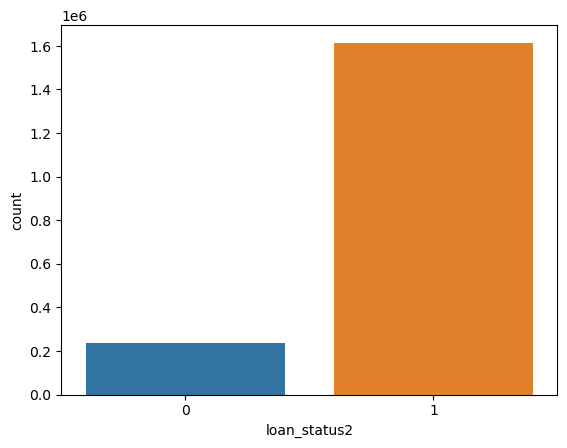

In [20]:
#Se evidencia un desbalanceo de la variable a predecir, donde hay mayor cantidad de categorías 0
sns.countplot(df['loan_status2'])
df['loan_status2'].value_counts()

In [21]:
#Se procede al rebalanceo tomando como clase mayoritaria la categoría 1 y minoritaria la cat 0.
from sklearn.utils import resample

df_majority=df[(df['loan_status2']==1)] 
df_minority=df[(df['loan_status2']==0)]

# muestreo ascendente de la clase minoritaria
df_minority_unsampled=resample(df_minority, 
                              replace=True, 
                              n_samples=1614862, 
                              random_state=0) 

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria 
df_upsampled=pd.concat([df_minority_unsampled,df_majority]) #junta tablas
df_upsampled.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status2
1886203,2216459,12000.0,12000.0,12000.0,36 months,7.90,375.49,A,A4,PSD 202,10+ years,MORTGAGE,85000.0,Verified,Jan-2013,Charged Off,n,debt_consolidation,get out of debt,604xx,IL,29.24,1.0,690.0,694.0,0.0,12.0,0.0,7974.0,57.4,26.0,f,0.0,0.0,9283.55,9283.55,7334.27,1299.14,0.0,650.14,116.5104,375.49,589.0,585.0,0.0,1.0,Individual,0.0,0.0,262653.0,13900.0,0.0,23878.0,2072.0,73.1,0.0,0.0,120.0,177.0,25.0,25.0,2.0,25.0,4.0,4.0,6.0,5.0,11.0,10.0,7.0,14.0,6.0,12.0,0.0,0.0,0.0,0.0,80.0,25.0,0.0,0.0,351076.0,105981.0,7700.0,146376.0,N,Cash,N,0
283991,48736169,35000.0,35000.0,35000.0,60 months,9.99,743.48,B,B3,Sales,9 years,RENT,145000.0,Source Verified,May-2015,Charged Off,n,credit_card,Credit card refinancing,921xx,CA,15.37,0.0,715.0,719.0,0.0,6.0,0.0,56067.0,91.8,8.0,w,0.0,0.0,20035.11,20035.11,13624.33,6410.78,0.0,0.00,0.0000,743.48,504.0,500.0,0.0,1.0,Individual,0.0,0.0,69497.0,61100.0,0.0,11583.0,833.0,98.5,0.0,0.0,114.0,313.0,155.0,54.0,0.0,155.0,0.0,4.0,5.0,4.0,5.0,2.0,5.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,86100.0,69497.0,54400.0,25000.0,N,Cash,N,0
1685114,100044718,20000.0,20000.0,20000.0,36 months,11.49,659.43,B,B5,shopforman,10+ years,RENT,62681.0,Not Verified,Mar-2017,Charged Off,n,debt_consolidation,Debt consolidation,300xx,GA,25.64,0.0,720.0,724.0,0.0,10.0,0.0,10712.0,35.2,17.0,f,0.0,0.0,4603.24,4603.24,3371.11,1232.13,0.0,0.00,0.0000,659.43,569.0,565.0,0.0,1.0,Individual,0.0,0.0,50955.0,30400.0,4.0,5096.0,19688.0,35.2,0.0,0.0,130.0,177.0,24.0,12.0,1.0,24.0,2.0,4.0,4.0,8.0,8.0,6.0,8.0,10.0,4.0,10.0,0.0,0.0,0.0,1.0,88.2,12.5,0.0,0.0,82224.0,50955.0,30400.0,51824.0,N,Cash,N,0
1045916,72744801,32000.0,32000.0,32000.0,60 months,15.31,766.50,C,C5,UG Instructor,10+ years,MORTGAGE,100500.0,Verified,Feb-2016,Charged Off,n,debt_consolidation,Debt consolidation,070xx,NJ,27.44,0.0,675.0,679.0,0.0,18.0,0.0,21218.0,42.6,37.0,w,0.0,0.0,21435.27,21435.27,9977.15,8364.41,0.0,3093.71,556.8678,766.50,564.0,560.0,0.0,1.0,Individual,0.0,266.0,428663.0,49800.0,7.0,26791.0,25458.0,39.8,0.0,0.0,132.0,272.0,4.0,4.0,5.0,4.0,2.0,7.0,9.0,8.0,16.0,5.0,13.0,26.0,9.0,18.0,0.0,0.0,0.0,4.0,83.8,25.0,0.0,0.0,493133.0,85518.0,42300.0,95323.0,N,Cash,N,0
1715946,97530705,15000.0,15000.0,15000.0,60 months,13.99,348.95,C,C3,Medical Coder,10+ years,MORTGAGE,46000.0,Verified,Feb-2017,Charged Off,n,debt_consolidation,Debt consolidation,238xx,VA,27.45,2.0,670.0,674.0,0.0,15.0,0.0,32684.0,57.7,28.0,w,0.0,0.0,6969.64,6969.64,2845.46,2426.01,0.0,1698.17,305.6706,348.95,544.0,540.0,1.0,1.0,Individual,0.0,391.0,35151.0,56600.0,4.0,2511.0,15627.0,25.2,0.0,0.0,125.0,135.0,5.0,5.0,0.0,51.0,1.0,4.0,11.0,5.0,9.0,9.0,14.0,18.0,11.0,15.0,0.0,0.0,1.0,2.0,89.3,20.0,0.0,0.0,67400.0,35151.0,20900.0,10800.0,N,Cash,N,0


0    1614862
1    1614862
Name: loan_status2, dtype: int64

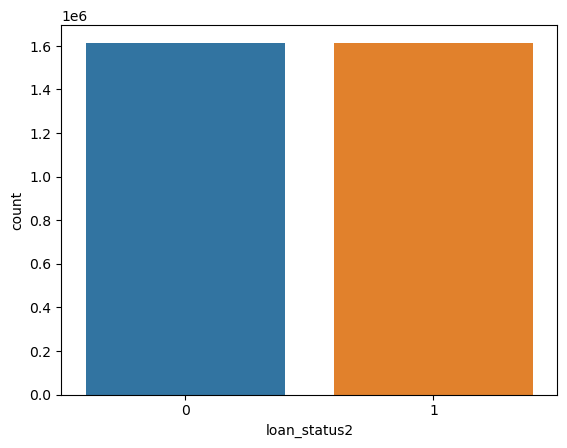

In [22]:
# Gráfico despues del balanceo
sns.countplot(df_upsampled['loan_status2'])
df_upsampled['loan_status2'].value_counts()

In [23]:
#forma de la tabla posterior al balanceo
df_upsampled.shape

(3229724, 89)

In [24]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229724 entries, 1886203 to 2260695
Data columns (total 89 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  purpose                     object 
 18  title                       object 
 19  zip_code       

# Eliminación de outliers de var numericas usando IQR

In [25]:
#se determinan las variables que deberian ser numericas
num_vars=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','fico_range_low','fico_range_high','inq_last_6mths','open_acc','pub_rec','revol_bal',
          'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
          'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','last_fico_range_high',
          'last_fico_range_low','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','acc_open_past_24mths','avg_cur_bal',
          'bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
          'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','num_accts_ever_120_pd','num_actv_bc_tl',
          'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0',
          'num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq',
          'percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

In [26]:
# Se elimina un 0.025 de cada lado
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.025)
        q3 = df[col].quantile(0.975)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check = num_vars

# Solicitar la función que remueve los outliers usando IQR
df_limpio = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
df_limpio.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status2
1886203,2216459,12000.0,12000.0,12000.0,36 months,7.90,375.49,A,A4,PSD 202,10+ years,MORTGAGE,85000.0,Verified,Jan-2013,Charged Off,n,debt_consolidation,get out of debt,604xx,IL,29.24,1.0,690.0,694.0,0.0,12.0,0.0,7974.0,57.4,26.0,f,0.0,0.0,9283.55,9283.55,7334.27,1299.14,0.0,650.14,116.5104,375.49,589.0,585.0,0.0,1.0,Individual,0.0,0.0,262653.0,13900.0,0.0,23878.0,2072.0,73.1,0.0,0.0,120.0,177.0,25.0,25.0,2.0,25.0,4.0,4.0,6.0,5.0,11.0,10.0,7.0,14.0,6.0,12.0,0.0,0.0,0.0,0.0,80.0,25.0,0.0,0.0,351076.0,105981.0,7700.0,146376.0,N,Cash,N,0
1685114,100044718,20000.0,20000.0,20000.0,36 months,11.49,659.43,B,B5,shopforman,10+ years,RENT,62681.0,Not Verified,Mar-2017,Charged Off,n,debt_consolidation,Debt consolidation,300xx,GA,25.64,0.0,720.0,724.0,0.0,10.0,0.0,10712.0,35.2,17.0,f,0.0,0.0,4603.24,4603.24,3371.11,1232.13,0.0,0.00,0.0000,659.43,569.0,565.0,0.0,1.0,Individual,0.0,0.0,50955.0,30400.0,4.0,5096.0,19688.0,35.2,0.0,0.0,130.0,177.0,24.0,12.0,1.0,24.0,2.0,4.0,4.0,8.0,8.0,6.0,8.0,10.0,4.0,10.0,0.0,0.0,0.0,1.0,88.2,12.5,0.0,0.0,82224.0,50955.0,30400.0,51824.0,N,Cash,N,0
1045916,72744801,32000.0,32000.0,32000.0,60 months,15.31,766.50,C,C5,UG Instructor,10+ years,MORTGAGE,100500.0,Verified,Feb-2016,Charged Off,n,debt_consolidation,Debt consolidation,070xx,NJ,27.44,0.0,675.0,679.0,0.0,18.0,0.0,21218.0,42.6,37.0,w,0.0,0.0,21435.27,21435.27,9977.15,8364.41,0.0,3093.71,556.8678,766.50,564.0,560.0,0.0,1.0,Individual,0.0,266.0,428663.0,49800.0,7.0,26791.0,25458.0,39.8,0.0,0.0,132.0,272.0,4.0,4.0,5.0,4.0,2.0,7.0,9.0,8.0,16.0,5.0,13.0,26.0,9.0,18.0,0.0,0.0,0.0,4.0,83.8,25.0,0.0,0.0,493133.0,85518.0,42300.0,95323.0,N,Cash,N,0
1715946,97530705,15000.0,15000.0,15000.0,60 months,13.99,348.95,C,C3,Medical Coder,10+ years,MORTGAGE,46000.0,Verified,Feb-2017,Charged Off,n,debt_consolidation,Debt consolidation,238xx,VA,27.45,2.0,670.0,674.0,0.0,15.0,0.0,32684.0,57.7,28.0,w,0.0,0.0,6969.64,6969.64,2845.46,2426.01,0.0,1698.17,305.6706,348.95,544.0,540.0,1.0,1.0,Individual,0.0,391.0,35151.0,56600.0,4.0,2511.0,15627.0,25.2,0.0,0.0,125.0,135.0,5.0,5.0,0.0,51.0,1.0,4.0,11.0,5.0,9.0,9.0,14.0,18.0,11.0,15.0,0.0,0.0,1.0,2.0,89.3,20.0,0.0,0.0,67400.0,35151.0,20900.0,10800.0,N,Cash,N,0
1272353,16303051,6000.0,6000.0,6000.0,36 months,12.49,200.70,B,B5,machinist,3 years,MORTGAGE,58000.0,Not Verified,May-2014,Charged Off,n,debt_consolidation,Debt consolidation,117xx,NY,11.55,1.0,700.0,704.0,1.0,5.0,0.0,4712.0,52.9,9.0,w,0.0,0.0,1570.64,1570.64,561.69,241.11,0.0,767.84,7.6784,200.70,664.0,660.0,0.0,1.0,Individual,0.0,0.0,5469.0,8900.0,3.0,1094.0,3477.0,39.0,0.0,0.0,76.0,167.0,3.0,3.0,0.0,3.0,0.0,3.0,4.0,3.0,6.0,2.0,4.0,7.0,4.0,5.0,0.0,0.0,0.0,3.0,77.8,33.3,0.0,0.0,28262.0,5469.0,5700.0,19362.0,N,Cash,N,0


In [27]:
#la base final limpia sin nulos, ni outliers, balanceada, con var dependiente recategorizada queda con las sig filas y columnas
df_limpio.shape

(3065252, 89)

In [28]:
df_limpio['emp_length'].unique()

array(['10+ years', '3 years', '1 year', '< 1 year', '8 years', '2 years',
       '5 years', '9 years', '4 years', '7 years', '6 years'],
      dtype=object)

In [29]:
df_limpio['grade'].unique() 

array(['A', 'B', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [30]:
df_limpio['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'home_improvement', 'other',
       'small_business', 'major_purchase', 'medical', 'vacation', 'car',
       'house', 'moving', 'wedding', 'renewable_energy', 'educational'],
      dtype=object)

# transformación de variables categóricas a numéricas
Se aplica one hot encoding para transformar variables categoricas a etiquetas numericas para ejecutar los algoritmos

In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_limpio['term']=label_encoder.fit_transform(df_limpio['term'])
df_limpio['grade']=label_encoder.fit_transform(df_limpio['grade'])
df_limpio['sub_grade']=label_encoder.fit_transform(df_limpio['sub_grade'])
df_limpio['emp_title']=label_encoder.fit_transform(df_limpio['emp_title'])
df_limpio['emp_length']=label_encoder.fit_transform(df_limpio['emp_length'])
df_limpio['home_ownership']=label_encoder.fit_transform(df_limpio['home_ownership'])
df_limpio['verification_status']=label_encoder.fit_transform(df_limpio['verification_status'])
df_limpio['issue_d']=label_encoder.fit_transform(df_limpio['issue_d'])
df_limpio['pymnt_plan']=label_encoder.fit_transform(df_limpio['pymnt_plan'])
df_limpio['purpose']=label_encoder.fit_transform(df_limpio['purpose'])
df_limpio['title']=label_encoder.fit_transform(df_limpio['title'])
df_limpio['zip_code']=label_encoder.fit_transform(df_limpio['zip_code'])
df_limpio['addr_state']=label_encoder.fit_transform(df_limpio['addr_state'])
df_limpio['initial_list_status']=label_encoder.fit_transform(df_limpio['initial_list_status'])
df_limpio['application_type']=label_encoder.fit_transform(df_limpio['application_type'])
df_limpio['hardship_flag']=label_encoder.fit_transform(df_limpio['hardship_flag'])
df_limpio['disbursement_method']=label_encoder.fit_transform(df_limpio['disbursement_method'])
df_limpio['debt_settlement_flag']=label_encoder.fit_transform(df_limpio['debt_settlement_flag'])

# RANDOM FOREST

Se aplica random forest para conocer las principales 15 variables y realizar análisis exploratorio con las mismas

In [33]:
df_limpio.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'd

In [34]:
#Se crean vectores de X y Y
X = df_limpio.drop(['loan_status2','id','loan_status'], axis=1)  
y = df_limpio['loan_status2']

In [35]:
#Se divide el set de datos en entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [36]:
from sklearn.ensemble import RandomForestClassifier

Modelo Random Forest con n_estimators = 100

In [37]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
y_pred_100 = rfc_100.predict(X_test)

In [39]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc_100.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc_100.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 1.00


In [40]:
print('F-1 Score : ',(f1_score(y_test, y_pred_100, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_100, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_100, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_100, average='micro')))

F-1 Score :  0.9976619659495246
Precision Score :  0.9976619659495246
Recall Score :  0.9976619659495246
Jaccard Score :  0.9953348392038415


In [41]:
print (classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    456582
           1       1.00      1.00      1.00    462994

    accuracy                           1.00    919576
   macro avg       1.00      1.00      1.00    919576
weighted avg       1.00      1.00      1.00    919576



<Figure size 900x900 with 0 Axes>

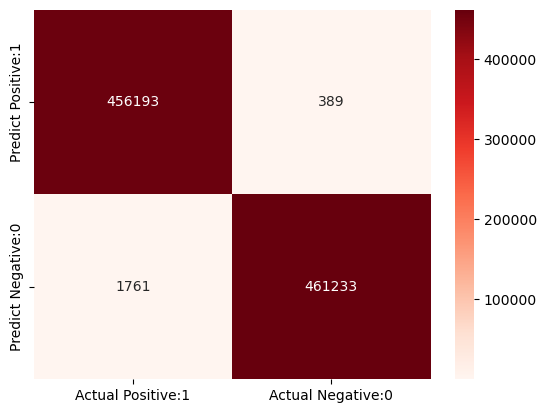

<Figure size 900x900 with 0 Axes>

In [42]:
cm = confusion_matrix(y_test, y_pred_100)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [43]:
y_pred_prob = rfc_100.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

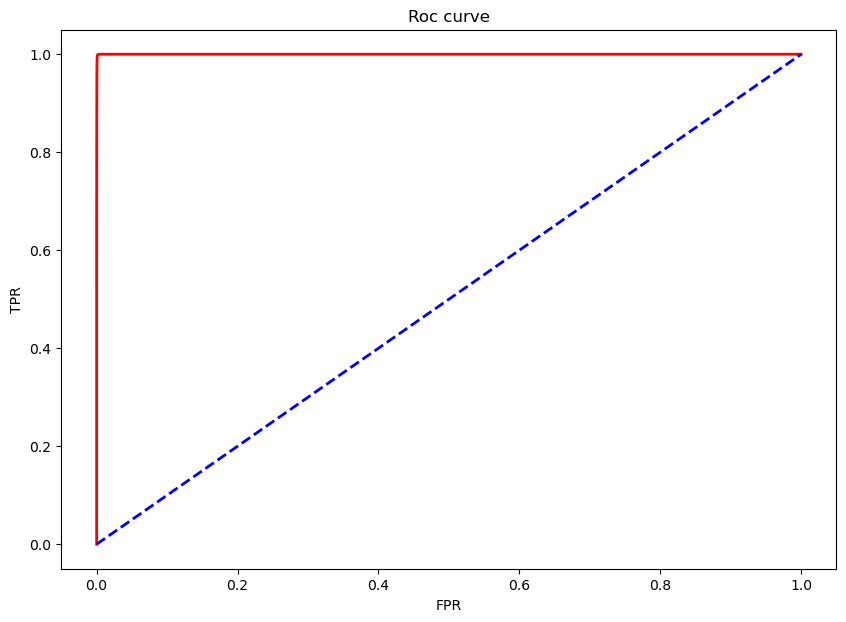

In [44]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [45]:
#se obtienen las 15 principales características
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
feature_scores

last_fico_range_high       0.186791
last_fico_range_low        0.185414
recoveries                 0.092256
last_pymnt_amnt            0.075429
collection_recovery_fee    0.069781
total_rec_prncp            0.054409
out_prncp                  0.044118
out_prncp_inv              0.040962
total_pymnt_inv            0.021378
total_pymnt                0.020008
loan_amnt                  0.014503
funded_amnt                0.012068
total_rec_late_fee         0.011412
installment                0.011021
funded_amnt_inv            0.010548
dtype: float64

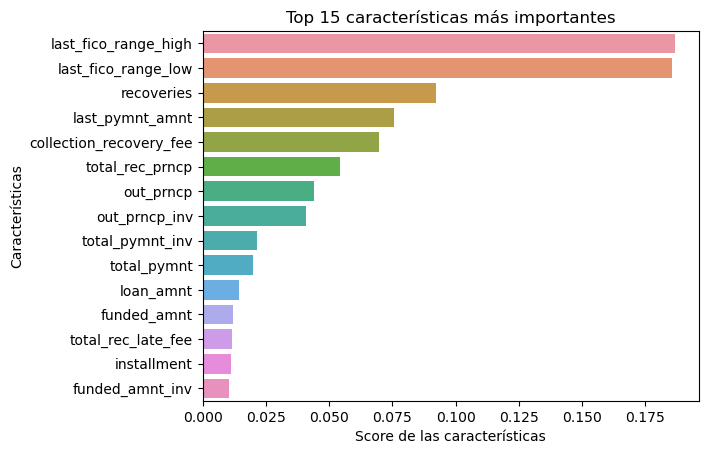

In [46]:
#Graficar las características
sns.barplot(x=feature_scores, y=feature_scores.index)

# Agregamos etiquetas al gráfico 

plt.xlabel('Score de las características')

plt.ylabel('Características')

# Agregamos título al gráfico

plt.title("Top 15 características más importantes")

plt.show()


# Análisis exploratorio

Se realiza el análisis exploratorio con las var elegidas, ya que se dificultaba la visualizacion de las más de 100 variables que tenía el dataser original.

In [48]:
#se seleccionan las sig variables considerando el top  5 de caracteristicas mas importantes de RD y otras var que 
#son importantes segun nuestro criterio

df_seleccionado=df_limpio[['id','last_fico_range_high','last_fico_range_low','last_pymnt_amnt','recoveries',
'collection_recovery_fee','emp_length','annual_inc','grade','open_acc','num_rev_accts',
'purpose','loan_status2']]
df_seleccionado.head()

,id,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,recoveries,collection_recovery_fee,emp_length,annual_inc,grade,open_acc,num_rev_accts,purpose,loan_status2
1886203,2216459,589.0,585.0,375.49,650.14,116.5104,1,85000.0,0,12.0,14.0,2,0
1685114,100044718,569.0,565.0,659.43,0.00,0.0000,1,62681.0,1,10.0,10.0,2,0
1045916,72744801,564.0,560.0,766.50,3093.71,556.8678,1,100500.0,2,18.0,26.0,2,0
1715946,97530705,544.0,540.0,348.95,1698.17,305.6706,1,46000.0,2,15.0,18.0,2,0
1272353,16303051,664.0,660.0,200.70,767.84,7.6784,3,58000.0,1,5.0,7.0,2,0


<AxesSubplot:>

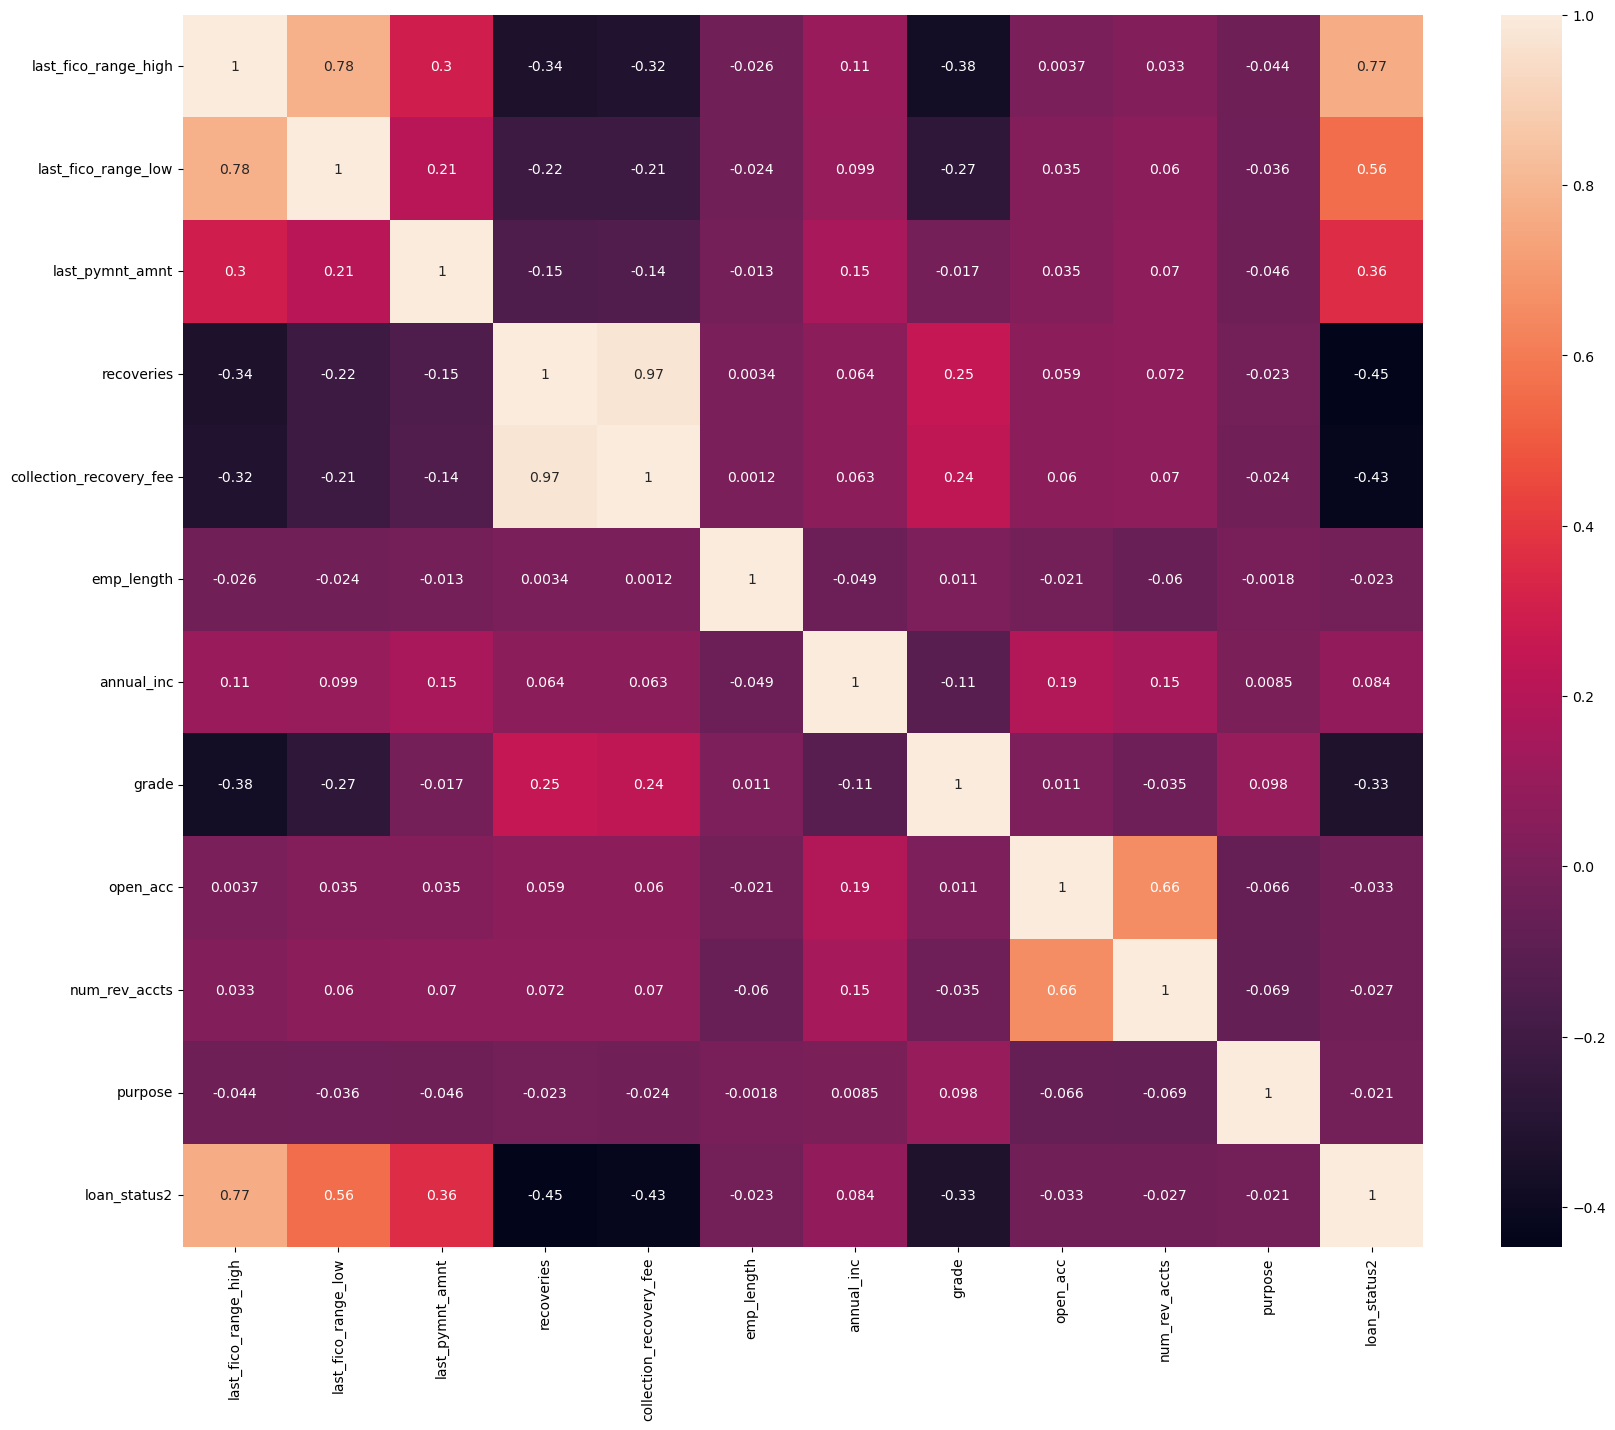

In [49]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_seleccionado.corr(), 
            fmt='.2g', annot=True
           )
#se decide quitar las sig variables que cuentan con alta correlacion para evitar problemas de colinealidad:
#last_fico_range_low y recoveries

In [50]:
df_seleccionado=df_limpio[['id','last_fico_range_high','last_pymnt_amnt',
'collection_recovery_fee','emp_length','annual_inc','grade','open_acc','num_rev_accts',
'purpose','loan_status2']]

In [51]:
df_seleccionado['emp_length'].unique()
# orden: ['10+ years', '3 years', '1 year', '< 1 year', '8 years', '2 years',
 #      '5 years', '9 years', '4 years', '7 years', '6 years']

array([ 1,  3,  0, 10,  8,  2,  5,  9,  4,  7,  6])

In [52]:
df_seleccionado['grade'].unique()
# orden:'A', 'B', 'C', 'E', 'D', 'F', 'G'

array([0, 1, 2, 4, 3, 5, 6])

In [53]:
df_seleccionado['purpose'].unique()
# orden: 'debt_consolidation', 'credit_card', 'home_improvement', 'other',
 #       'small_business', 'major_purchase', 'medical', 'vacation', 'car',
  #       'house', 'moving', 'wedding', 'renewable_energy', 'educational'

array([ 2,  1,  4,  9, 11,  6,  7, 12,  0,  5,  8, 13, 10,  3])

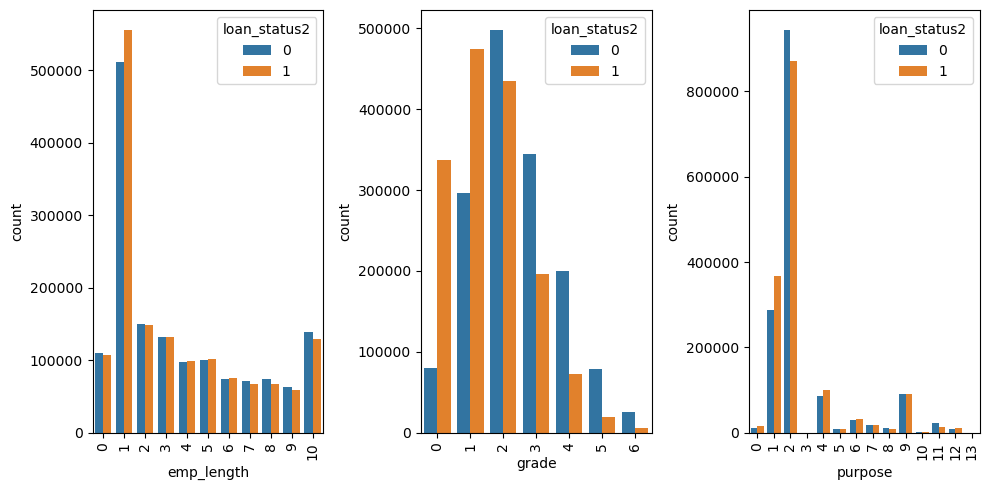

In [54]:
vars=['emp_length','grade','purpose']
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (vars):
    sns.countplot(x=var, data=df_seleccionado, hue='loan_status2',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()
#las personas con antiguedad laboral de màs de 10 años son las que tienen más créditos.
#los grades otorgados con mayor cantidad son C seguido de B.
#el destino de crédito que predomina es el de consolidación de deuda.

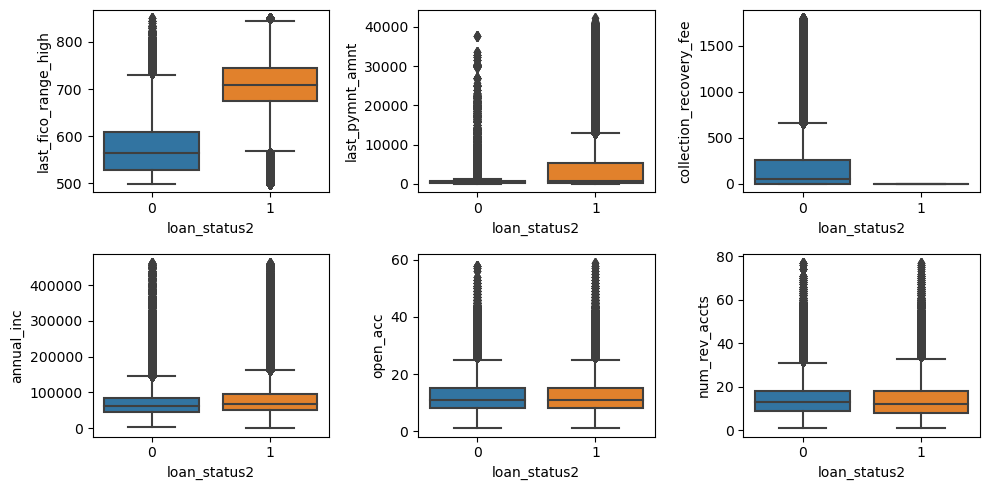

In [56]:
num_vars=['last_fico_range_high','last_pymnt_amnt',
'collection_recovery_fee','annual_inc','open_acc','num_rev_accts']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x='loan_status2', data=df_seleccionado, y=var,ax=axs[i])
    
fig.tight_layout()
    
plt.show()


In [57]:
#se decide eliminar nuevamente outliers pero solo teniendo el df_seleccionado lo cual evitara que se eliminen tantas filas, quedando con más de 1MM de filas.
#Se elimina 0.25 de cada lado
df_seleccionado2 = df_seleccionado.copy()

def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check =['last_fico_range_high','last_pymnt_amnt',
'collection_recovery_fee','annual_inc','open_acc','num_rev_accts']

# Solicitar la función que remueve los outliers usando IQR
df_limpio2 = remove_outliers_iqr(df_seleccionado2 , columns_to_check)

# Mostrar el resultado en el dataframe
df_limpio2.head()

,id,last_fico_range_high,last_pymnt_amnt,collection_recovery_fee,emp_length,annual_inc,grade,open_acc,num_rev_accts,purpose,loan_status2
1886203,2216459,589.0,375.49,116.5104,1,85000.0,0,12.0,14.0,2,0
1685114,100044718,569.0,659.43,0.0000,1,62681.0,1,10.0,10.0,2,0
1272353,16303051,664.0,200.70,7.6784,3,58000.0,1,5.0,7.0,2,0
754235,139967799,559.0,285.61,0.0000,1,137000.0,2,24.0,30.0,1,0
841617,137285483,569.0,591.02,0.0000,0,53000.0,4,13.0,4.0,4,0


In [58]:
#cantidad de filas y columnas de df limpio final
df_limpio2.shape

(1972678, 11)

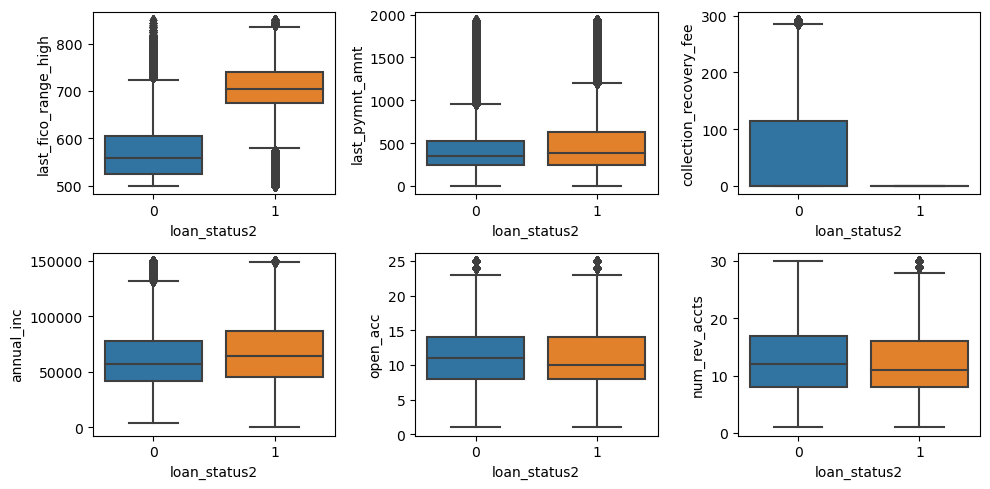

In [59]:
#se evidencian variables con menor cantidad de outliers
num_vars=['last_fico_range_high','last_pymnt_amnt',
'collection_recovery_fee','annual_inc','open_acc','num_rev_accts']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x='loan_status2', data=df_limpio2, y=var,ax=axs[i])

fig.tight_layout()

plt.show()

In [61]:
#Se exporta df limpio a csv para ejcutarlo en un segundo libro de jupyter para hacer más rápido el procesamiento de los modelos.
df_limpio2.to_csv('df_limpio2.csv')